In [43]:
import sys
sys.path.insert(1, '/home/BCCRC.CA/ssubedi/projects/experiments/asapp/asap/python')
sys.path.insert(1, '/home/BCCRC.CA/ssubedi/projects/experiments/asapp/asap')

from util._io import read_config
from collections import namedtuple
from pathlib import Path
import pandas as pd
import numpy as np
import logging
from scannotation import ASAPP
import asapc 
from data._dataloader import DataSet
from util import _topics


import matplotlib.pylab as plt
import seaborn as sns
import colorcet as cc

from data import _sim 
from scipy import stats
from sklearn.metrics import mean_squared_error as mse

import joblib

experiment = '/projects/experiments/asapp/'
server = Path.home().as_posix()
experiment_home = server+experiment
experiment_config = read_config(experiment_home+'config.yaml')
args = namedtuple('Struct',experiment_config.keys())(*experiment_config.values())

dl = DataSet(data_mode='mtx',data_ondisk=False)
dl.config = args
dl.initialize_path()
dl.initialize_data()
print(dl.inpath)
print(dl.outpath)


/home/BCCRC.CA/ssubedi/projects/experiments/asapp/data/temp/temp
/home/BCCRC.CA/ssubedi/projects/experiments/asapp/result/temp/temp


In [44]:
df_beta = pd.read_csv(dl.outpath+'_beta.csv.gz').T
df_theta = pd.read_csv(dl.outpath+'_theta.csv.gz')
df_corr = pd.read_csv(dl.outpath+'_corr.csv.gz')
df_llk = pd.read_csv(dl.outpath+'_llktrace.csv.gz')

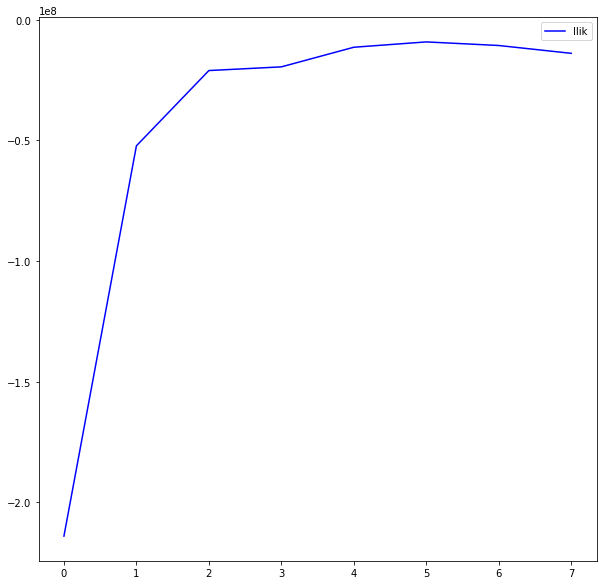

In [45]:
plt.plot(df_llk,'b',label='llik')
plt.legend()

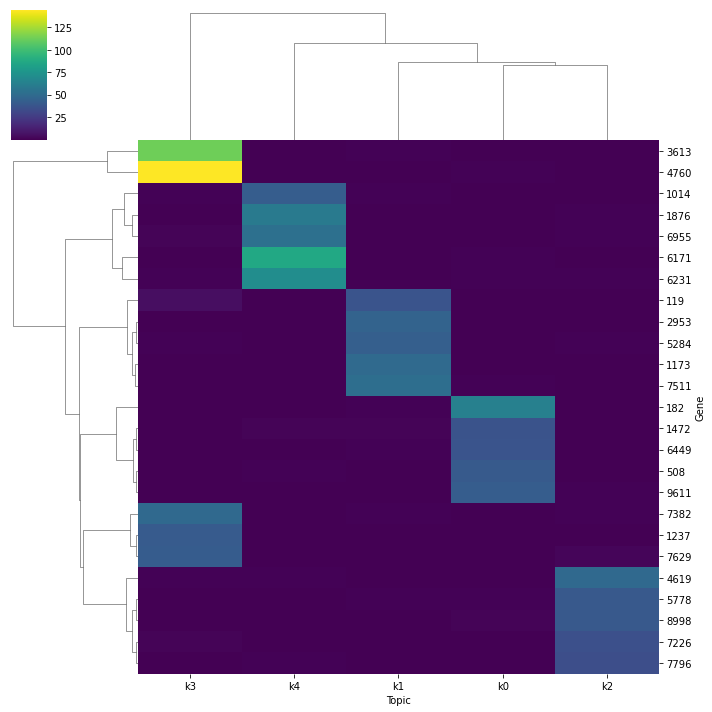

In [46]:
df_beta.columns = dl.cols
df_top = _topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=5)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

In [47]:
beta = nmf.beta
theta = reg.A
uu = beta.sum(0)
beta = beta/uu
prop = theta * uu
zz = prop.T.sum(0).reshape(theta.shape[0],1)
prop = prop/zz


AttributeError: 'asapc.ASAPNMFResult' object has no attribute 'beta'

In [48]:
df_pl = pd.DataFrame(dl.rows)
df_pl.columns = ['cell']

In [49]:
import umap

df_umap= pd.DataFrame()
df_umap['cell'] = dl.rows
df_umap['topic'] = [x for x in df_theta.iloc[:,:].idxmax(axis=1)]

df_pl['cell_type'] = df_umap['topic']

umap_2d = umap.UMAP(n_components=2, init='random', random_state=0,min_dist=0.0,metric='cosine')
proj_2d = umap_2d.fit(df_theta.iloc[:,1:])
df_umap[['umap1','umap2']] = umap_2d.embedding_[:,[0,1]]
df_umap
df_umap = pd.merge(df_umap,df_pl[['cell','cell_type']],on='cell',how='left')
df_umap = df_umap[~df_umap['cell_type'].isna()]
df_umap



,cell,topic,umap1,umap2,cell_type
0,1,3,2.401169,6.726989,3
1,2,1,6.472270,4.584123,1
2,3,4,5.438069,13.461795,4
3,4,0,0.455054,9.297137,0
4,5,3,1.599842,8.787649,3
...,...,...,...,...,...
2995,2996,3,5.076932,1.302815,3
2996,2997,1,4.505062,4.531553,1
2997,2998,3,4.294843,1.826868,3
2998,2999,2,9.114977,4.580611,2


Text(0.5, 1.0, 'ASAP')

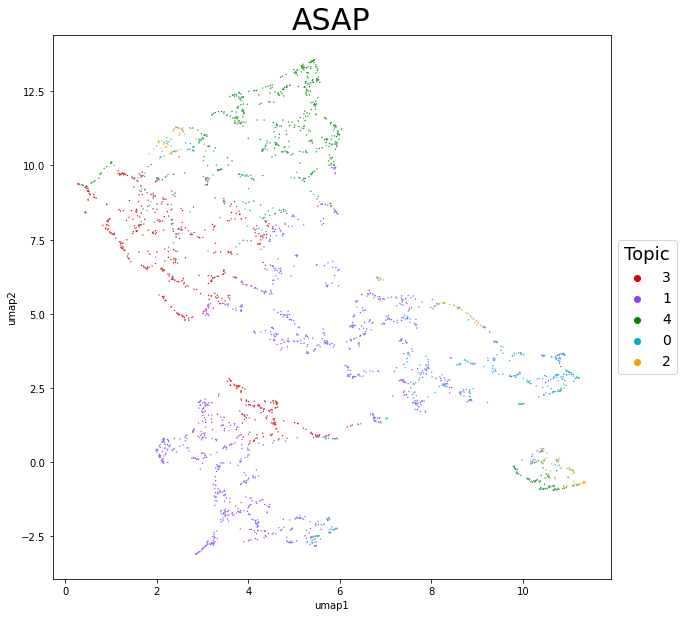

In [50]:
plt.rcParams["figure.figsize"] = (10,10)

cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['topic'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='topic',s=2,palette=cp,legend=True)
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("ASAP",fontsize=30)